In [136]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import accuracy_score

# Load data and preprocessing

In [137]:
from datasets import load_dataset

dataset = load_dataset("kailasv/ArtWhisperer", split='train')


Found cached dataset parquet (/Users/ekociubes/.cache/huggingface/datasets/kailasv___parquet/kailasv--ArtWhisperer-8e6557a66496a6c9/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


In [138]:
df = dataset.to_pandas()

In [23]:
df

,user_id,target_id,target_image,target_positive_prompt,target_negative_prompt,target_image_embedding,target_positive_text_embedding,target_negative_text_embedding,Famous person?,Famous landmark?,...,generated_negative_prompt,generated_image_embedding,generated_positive_text_embedding,generated_negative_text_embedding,ai_model_name,trajectory_index,score,human_rating,time_taken,filtered_image
0,000c5c4f,333289ce63f49e55,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,lush flowers in a crystal vase by jeremy mann ...,,"{'value': [0.011545462, -0.19846655, 0.0341740...","{'value': [0.03968004, -0.06477152, 0.00408030...","{'value': [0.022232534, -0.042113047, 0.003425...",False,False,...,,"{'value': [-0.029368764, -0.20550364, 0.071697...","{'value': [0.044601817, -0.053693958, 0.023920...","{'value': [0.022232534, -0.042113047, 0.003425...",SDv2.1,1,74,NaN,0 days 00:01:18,False
1,000c5c4f,333289ce63f49e55,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,lush flowers in a crystal vase by jeremy mann ...,,"{'value': [0.011545462, -0.19846655, 0.0341740...","{'value': [0.03968004, -0.06477152, 0.00408030...","{'value': [0.022232534, -0.042113047, 0.003425...",False,False,...,,"{'value': [-0.024518877, -0.18585745, 0.065554...","{'value': [0.03676109, -0.05245878, 0.02738895...","{'value': [0.022232534, -0.042113047, 0.003425...",SDv2.1,2,67,NaN,0 days 00:01:00,False
2,000c5c4f,81096303ad1d5136,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,inside of apartment in a Futuristic cyberpunk....,,"{'value': [-0.014417482, -0.06511984, 0.011983...","{'value': [0.029600205, -0.048497513, -0.00174...","{'value': [0.022232534, -0.042113047, 0.003425...",False,False,...,,"{'value': [-0.035998974, -0.08956755, 0.012473...","{'value': [0.038211096, -0.042178888, 0.015708...","{'value': [0.022232534, -0.042113047, 0.003425...",SDv2.1,1,43,NaN,0 days 00:00:53,False
3,000c5c4f,81096303ad1d5136,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,inside of apartment in a Futuristic cyberpunk....,,"{'value': [-0.014417482, -0.06511984, 0.011983...","{'value': [0.029600205, -0.048497513, -0.00174...","{'value': [0.022232534, -0.042113047, 0.003425...",False,False,...,bed,"{'value': [-0.02588086, -0.08519676, 0.0191440...","{'value': [0.038211096, -0.042178888, 0.015708...","{'value': [0.01797389, -0.047485746, 0.0239664...",SDv2.1,2,34,NaN,0 days 00:00:30,False
4,000c5c4f,81096303ad1d5136,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,inside of apartment in a Futuristic cyberpunk....,,"{'value': [-0.014417482, -0.06511984, 0.011983...","{'value': [0.029600205, -0.048497513, -0.00174...","{'value': [0.022232534, -0.042113047, 0.003425...",False,False,...,bed,"{'value': [-0.050649356, -0.21938352, 0.056101...","{'value': [0.050468884, -0.04265242, 0.0124854...","{'value': [0.01797389, -0.047485746, 0.0239664...",SDv2.1,3,23,NaN,0 days 00:00:37,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51021,ffec7b6e,47a9a64cec09fd8a,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"portrait of aggressive smiling messi, d & d, m...",,"{'value': [0.014840378, -0.11489889, 0.0193733...","{'value': [0.015329161, -0.06692115, -0.000144...","{'value': [0.022232534, -0.042113047, 0.003425...",True,False,...,,"{'value': [-0.031976778, -0.04059022, 0.022743...","{'value': [0.024581758, -0.05051545, 0.0183453...","{'value': [0.022232534, -0.042113047, 0.003425...",SDv2.1,8,31,NaN,0 days 00:00:03,False
51022,ffec7b6e,a22e8d823cd08d4d,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"blood and tar textures, art by greg rutkowski,...",,"{'value': [-0.017083334, -0.039827034, -0.0073...","{'value': [0.03266319, -0.06450236, 0.01258917...","{'value': [0.022232534, -0.042113047, 0.003425...",False,False,...,,"{'value': [-0.052054647, -0.15987964, 0.000441...","{'value': [0.03219789, -0.054660957, 0.0037015...","{'value': [0.022232534, -0.042113047, 0.003425...",SDv2.1,1,66,NaN,0 days 00:59:38,False
51023,ffec7b6e,a22e8d823cd08

In [24]:
#df_sorted = df.sort_values(by='target_id')
unique_df = df.drop_duplicates(subset='target_id', keep='last')

In [25]:
unique_df

,user_id,target_id,target_image,target_positive_prompt,target_negative_prompt,target_image_embedding,target_positive_text_embedding,target_negative_text_embedding,Famous person?,Famous landmark?,...,generated_negative_prompt,generated_image_embedding,generated_positive_text_embedding,generated_negative_text_embedding,ai_model_name,trajectory_index,score,human_rating,time_taken,filtered_image
24453,7f4dad45,43b6aa56ba4946b5,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,The Pond and Midtown Manhattan as seen from Ga...,,"{'value': [-0.030571612, -0.1203694, 0.0274303...","{'value': [0.04686582, -0.060154133, -0.005704...","{'value': [0.022232534, -0.042113047, 0.003425...",False,True,...,"worst quality, low quality, bad quality","{'value': [-0.052654248, -0.13622798, -0.01186...","{'value': [0.034134116, -0.06977214, -0.024381...","{'value': [0.015914233, -0.04178146, -0.010691...",SDv2.1,1,99,NaN,0 days 00:01:58,False
24468,7f4dad45,a67b46de9482ca54,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"The United States Capitol, where Congress meet...",,"{'value': [0.027123742, -0.14444888, 0.0473444...","{'value': [0.04661192, -0.06659968, 0.00133758...","{'value': [0.022232534, -0.042113047, 0.003425...",False,True,...,"bad quality, worst quality, big trees, leaves,...","{'value': [0.011995856, -0.115199685, -0.00894...","{'value': [0.022030052, -0.063149974, -0.00347...","{'value': [0.031443603, -0.061125446, -0.00133...",SDv2.1,15,52,NaN,0 days 00:00:12,False
30227,9c367cc4,cff81d0297cbd8b2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"View of Midtown Manhattan from New Jersey, tak...",,"{'value': [-0.05127455, -0.19158496, 0.0057340...","{'value': [0.0555878, -0.04619377, -0.00870015...","{'value': [0.022232534, -0.042113047, 0.003425...",False,True,...,,"{'value': [-0.027045224, -0.19872628, 0.033642...","{'value': [0.040012825, -0.05033991, 0.0021861...","{'value': [0.022232534, -0.042113047, 0.003425...",SDv2.1,5,59,NaN,0 days 00:00:05,False
30480,9edaba4c,6dc88ef282408203,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,an intricate detail of a city street in the me...,,"{'value': [-0.02050324, -0.075162895, -0.02441...","{'value': [0.040285584, -0.055751327, -0.00189...","{'value': [0.022232534, -0.042113047, 0.003425...",False,False,...,,"{'value': [-0.010402048, -0.067118764, -0.0057...","{'value': [0.024946643, -0.058335394, -0.01314...","{'value': [0.022232534, -0.042113047, 0.003425...",SDv2.1,11,71,NaN,0 days 00:00:14,False
33574,b0ea21ea,ce64778d039fed0f,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"streets of a fantasy desert kingdom, 8k concep...",,"{'value': [-0.022905692, 0.035817567, -0.03611...","{'value': [0.014885657, -0.06828318, 0.0129199...","{'value': [0.022232534, -0.042113047, 0.003425...",False,False,...,,"{'value': [-0.0015677295, -0.027117316, -0.001...","{'value': [0.0518766, -0.053132694, -0.0161617...","{'value': [0.022232534, -0.042113047, 0.003425...",SDv2.1,1,63,NaN,0 days 00:01:52,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50948,ffa45c66,53d3ee263265b53c,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,Yellow medallion taxicabs are a widely recogni...,,"{'value': [-0.017003313, -0.10521262, -0.02382...","{'value': [0.062180784, -0.048831884, 0.030519...","{'value': [0.022232534, -0.042113047, 0.003425...",False,False,...,,"{'value': [-0.015765494, -0.13804615, -0.00258...","{'value': [0.028616505, -0.038944114, -0.00508...","{'value': [0.022232534, -0.042113047, 0.003425...",SDv2.1,7,90,NaN,0 days 00:00:14,False
50953,ffa45c66,6ab9bd6f23124b9d,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"hyperrealism, detailed textures, photorealisti...",,"{'value': [-0.067045435, -0.037389528, -0.0050...","{'value': [-0.0012932598, -0.066835836, -0.034...","{'value': [0.022232534, -0.042113047, 0.003425...",False,False,...,,"{'value': [-0.021598466, -0.026662553, 0.06130...","{'value': [0.0563818, -0.044855375, 0.01022725...","{'value

In [26]:
scores_df = pd.read_json('/Users/ekociubes/COSC410/ProjectPt2/results.json')

In [27]:
scores_dict = scores_df["Local Steerability Scores"]
transformed_dict = [{"target_id": key, "steerability_score": value} for key, value in scores_dict.items()]

In [28]:
scores_df = pd.DataFrame(transformed_dict)
scores_df.head()

,target_id,steerability_score
0,333289ce63f49e55,0.492148
1,81096303ad1d5136,0.428534
2,b2d5dd14d3252fa2,0.488146
3,67379540b569f702,0.563240
4,b9b1c233f4e8a632,0.572150


In [29]:
merged_df = pd.merge(df, scores_df, on='target_id', how='left')

In [30]:
merged_df.drop(['user_id', 'target_image', 'target_positive_prompt', 'target_negative_prompt', 
                'target_image_embedding', 'target_positive_text_embedding', 'target_negative_text_embedding',
                'generated_image_embedding', 'generated_positive_text_embedding', 'generated_negative_text_embedding',
                'ai_model_name', 'trajectory_index', 'filtered_image', 'human_rating', 'generated_image', 'generated_positive_prompt', 
               'generated_negative_prompt', 'time_taken'], axis=1, inplace=True)

In [31]:
merged_df.head()

,target_id,Famous person?,Famous landmark?,Manmade?,People?,Real image?,AI image?,Art?,Nature?,City?,Fantasy?,Sci-fi or space?,score,steerability_score
0,333289ce63f49e55,False,False,True,False,False,True,True,False,False,False,False,74,0.492148
1,333289ce63f49e55,False,False,True,False,False,True,True,False,False,False,False,67,0.492148
2,81096303ad1d5136,False,False,True,False,False,True,True,False,False,False,True,43,0.428534
3,81096303ad1d5136,False,False,True,False,False,True,True,False,False,False,True,34,0.428534
4,81096303ad1d5136,False,False,True,False,False,True,True,False,False,False,True,23,0.428534


In [32]:
boolean_columns = ['Famous person?', 'Famous landmark?', 'Manmade?', 'People?', 'Real image?', 'AI image?', 'Art?', 'Nature?', 'City?', 'Fantasy?', 'Sci-fi or space?']
for col in boolean_columns:
    merged_df[col] = merged_df[col].astype(int) #convert into integers not boolean values
merged_df = merged_df.dropna(subset=['steerability_score'])

In [33]:
merged_df.head()

,target_id,Famous person?,Famous landmark?,Manmade?,People?,Real image?,AI image?,Art?,Nature?,City?,Fantasy?,Sci-fi or space?,score,steerability_score
0,333289ce63f49e55,0,0,1,0,0,1,1,0,0,0,0,74,0.492148
1,333289ce63f49e55,0,0,1,0,0,1,1,0,0,0,0,67,0.492148
2,81096303ad1d5136,0,0,1,0,0,1,1,0,0,0,1,43,0.428534
3,81096303ad1d5136,0,0,1,0,0,1,1,0,0,0,1,34,0.428534
4,81096303ad1d5136,0,0,1,0,0,1,1,0,0,0,1,23,0.428534


# Train Linear Regression Model

In [125]:
from sklearn.metrics import mean_squared_error

X = merged_df[boolean_columns]
y = merged_df['steerability_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r_squared = model.score(X_test, y_test)
print(f'R-squared: {r_squared}')

Mean Squared Error: 0.0019304289921579722
R-squared: 0.14022512711873136


**Feature importance**

In [126]:
coefficients = model.coef_
features = X.columns

feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

print(feature_importance)

             Feature   Coefficient  Absolute Coefficient
4        Real image? -3.155263e+09          3.155263e+09
5          AI image? -3.155263e+09          3.155263e+09
8              City?  4.131970e-02          4.131970e-02
7            Nature?  3.518913e-02          3.518913e-02
10  Sci-fi or space?  2.400652e-02          2.400652e-02
6               Art? -2.317402e-02          2.317402e-02
0     Famous person?  1.748684e-02          1.748684e-02
2           Manmade?  1.074101e-02          1.074101e-02
1   Famous landmark? -9.995908e-03          9.995908e-03
9           Fantasy? -5.583759e-04          5.583759e-04
3            People? -2.348759e-04          2.348759e-04


# Analysis
* Was this model's performance worse on images that contain a specific feature?

In [127]:
#calculate error on test data
X_test['y_test'] = y_test
X_test['y_pred'] = y_pred
X_test['Error'] = (y_test-y_pred)
X_test['SquareError'] = (y_test-y_pred)**2
X_test

,Famous person?,Famous landmark?,Manmade?,People?,Real image?,AI image?,Art?,Nature?,City?,Fantasy?,Sci-fi or space?,y_test,y_pred,Error,SquareError
29084,0,0,1,0,0,1,0,0,0,1,0,0.526304,0.521383,0.004921,0.000024
12377,0,0,1,0,0,1,1,0,1,0,0,0.505482,0.540087,-0.034604,0.001197
4040,0,0,0,0,1,0,0,1,0,0,1,0.577739,0.530558,0.047181,0.002226
46805,0,0,1,0,0,1,1,0,0,0,0,0.484464,0.498767,-0.014303,0.000205
21695,0,0,1,1,1,0,1,0,0,0,0,0.446108,0.458695,-0.012587,0.000158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34831,0,1,1,0,0,1,1,0,0,0,1,0.552210,0.512777,0.039433,0.001555
45086,0,1,1,0,1,0,0,0,0,0,0,0.429251,0.472108,-0.042857,0.001837
35682,0,0,0,1,0,1,0,0,0,1,0,0.526403,0.510406,0.015996,0.000256
37836,0,0,0,0,0,1,1,0,0,0,0,0.508780,0.488026,0.020754,0.000431


In [128]:
print(pd.DataFrame.mean( (X_test[ X_test['Famous person?'] == 1 ])['SquareError'] ) )

0.0031505808028411356


In [131]:
#for all the images that have true values for each feature, make a new df for that feature
avg_err_by_feature = []
for feature in boolean_columns:
    avg_err_by_feature.append(pd.DataFrame.mean(X_test[ X_test[feature] == 1 ])['SquareError'] )
avg_err_by_feature

[0.0031505808028411356,
 0.002551879225082036,
 0.0019142181656643118,
 0.0024614967107301758,
 0.00594191406718482,
 0.0014563274737802914,
 0.0014781510800836505,
 0.0017368562703212347,
 0.0024934167553642274,
 0.0010155590219824342,
 0.0037154598100811623]

In [133]:
import matplotlib.pyplot as plt
%matplotlib inline

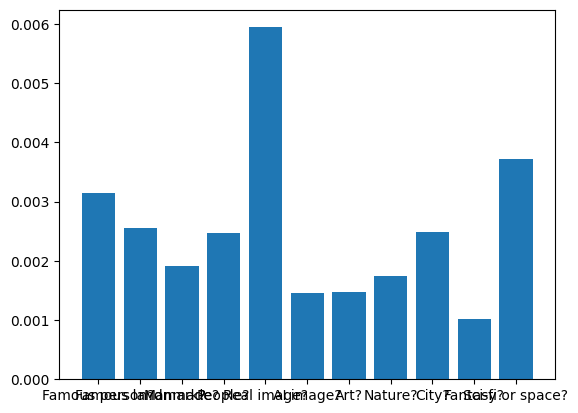

In [134]:
plt.bar(boolean_columns,avg_err_by_feature)
plt.show()

# Identified Features: 
- real images (about 0.006) and images that contain sci-fi and space (about 0.004) have highest mean squared error
- *model is not great at predicting steerability of these subsets of images*
- steerability of images with famous landmark are also difficult to predict ~(0.025)